In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.pyplot import *
# from sklearn.neural_network import MLPClassifier as sk
import time
from scipy import optimize

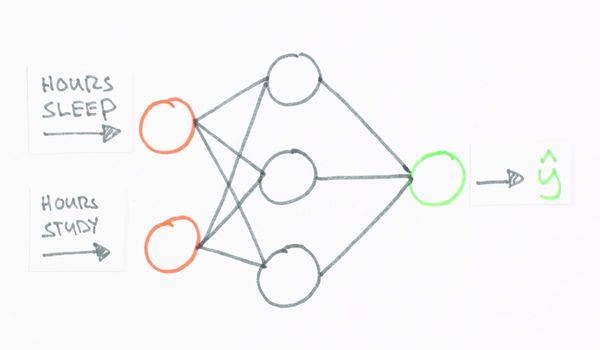

In [2]:
# X = (hours sleeping, hours studying), y = Score on test
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75], [82], [93]), dtype=float)
X

array([[ 3.,  5.],
       [ 5.,  1.],
       [10.,  2.]])

In [3]:
X = X/np.amax(X, axis=0)  # ???????
y = y/100 # Max test score is 100
X


array([[0.3, 1. ],
       [0.5, 0.2],
       [1. , 0.4]])

In [4]:
y

array([[0.75],
       [0.82],
       [0.93]])

In [5]:
class Neural_Network(object):
    def __init__(self):        
        # Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        # Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        
    def forward(self, X):
        #Propagate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self, z):
        # Derivative of s=Sigmoid function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        # Compute derivative with respect to W1 and W2
        self.yHat = self.forward(X)

        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)

        delta2 = np.dot(delta3, self.W2.T) * self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)

        return dJdW1, dJdW2
    
    # Helper function for interacting with other methods/classes
    
    def getParams(self):
        # Get W1 and W2 Rolled into vector
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        # Set W1 and W2 using single parameter vector
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize, self.hiddenLayerSize))

        W2_end = W1_end + self.hiddenLayerSize * self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))

    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

        

In [6]:
NN = Neural_Network()
NN.W1

array([[ 0.90580727,  0.5937335 ,  0.67943557],
       [-2.0717844 , -2.04817307, -0.88568627]])

In [7]:
NN.W2

array([[ 0.97131518],
       [-0.6779008 ],
       [ 0.61912397]])

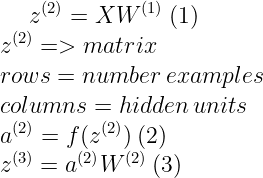

In [8]:
yHat = NN.forward(X)
yHat

array([[0.56345212],
       [0.62476627],
       [0.63713065]])

In [9]:
y

array([[0.75],
       [0.82],
       [0.93]])

Some examples for sigmoid():

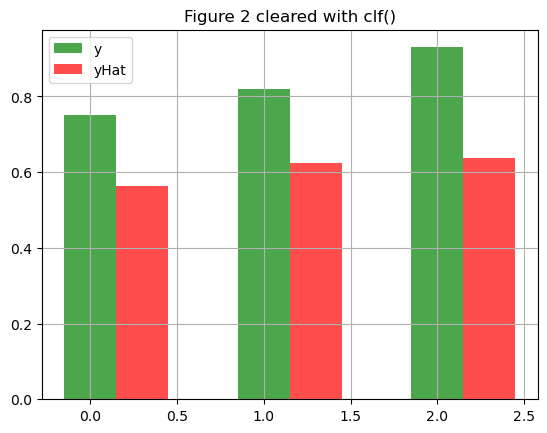

In [10]:
plt.clf()
plt.title("Figure 2 cleared with clf()")
#Compare estimate, yHat, to actually score
plt.bar([0,1,2], y.flatten(), width = 0.3, color='g',alpha=0.7)
plt.bar([0.3,1.3,2.3], yHat.flatten(), width = 0.3, color='r', alpha=0.7)
plt.grid(1)
plt.legend(['y', 'yHat'])

In [11]:
NN.sigmoid(1)

0.7310585786300049

In [12]:
NN.sigmoid(np.array([-1,0,1]))

array([0.26894142, 0.5       , 0.73105858])

In [13]:
NN.sigmoid(np.random.randn(3,3))

array([[0.27637275, 0.64814249, 0.56337889],
       [0.11113653, 0.54828308, 0.90252544],
       [0.3178438 , 0.28906499, 0.2206619 ]])

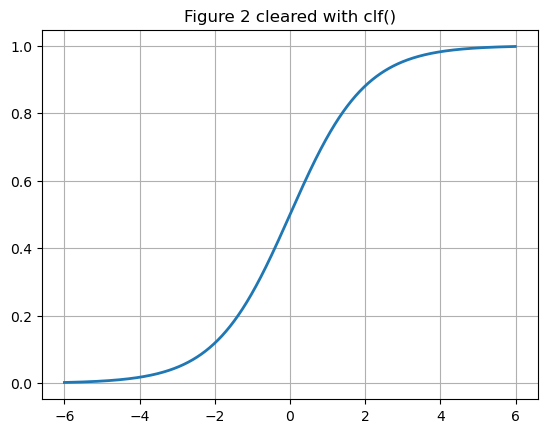

In [14]:
plt.clf()
plt.title("Figure 2 cleared with clf()")

testInput = np.arange(-6,6,0.01)
plt.plot(testInput, NN.sigmoid(testInput), linewidth=2)
plt.grid(1)

In [15]:
yHat = NN.forward(X)
yHat

array([[0.56345212],
       [0.62476627],
       [0.63713065]])

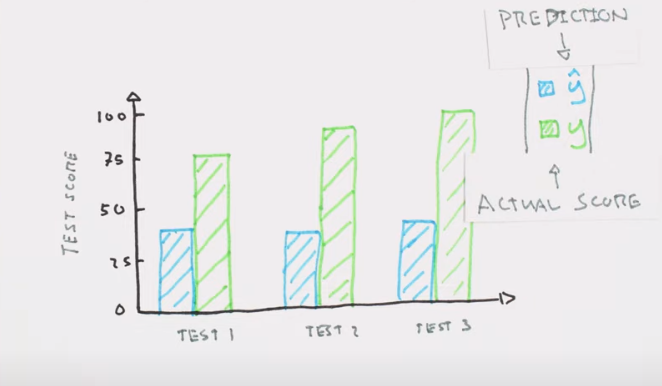

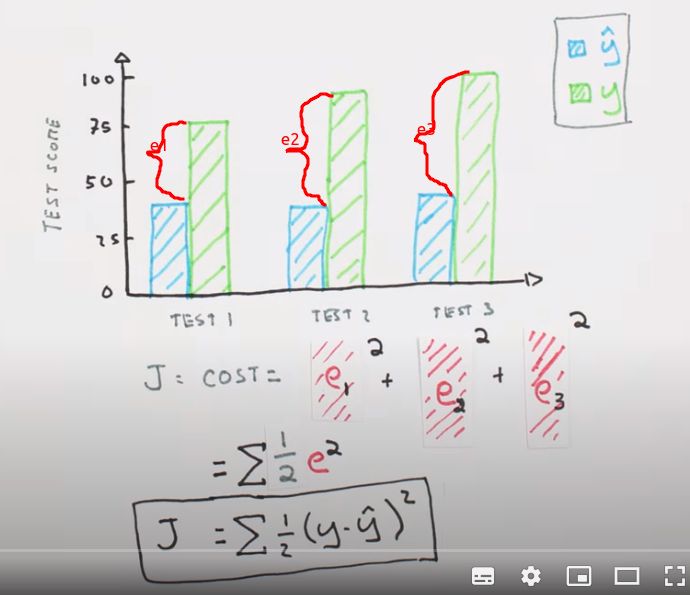

J => The smaller - the better

Training a Network = Minimizing a Cost Function

We can not manage data (inputs, X) but we can manage weights (W)

We have 9 different weights. And it is difficult to **recognize** them all in one time.

Let's imagine that we have only one W (weight)

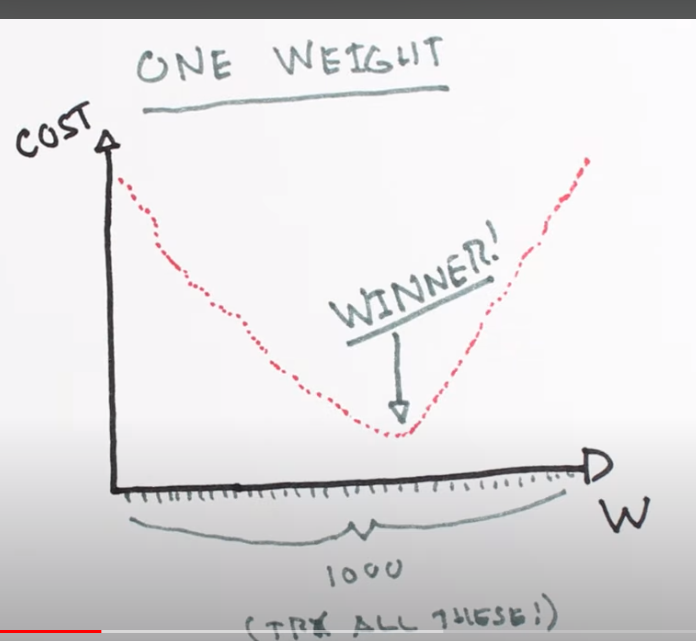

In [16]:
weightsToTry = np.linspace(-10,10,1000)
costs = np.zeros(1000)

startTime = time.perf_counter()
for i in range(1000):
    NN.W1[0,0] = weightsToTry[i]
    yHat = NN.forward(X)
    costs[i] = 0.5*np.sum((y-yHat)**2)

endTime = time.perf_counter()

In [17]:
timeElapsed = endTime - startTime
timeElapsed

0.06559639999977662

### Cost

Text(0.5, 0, 'Weight')

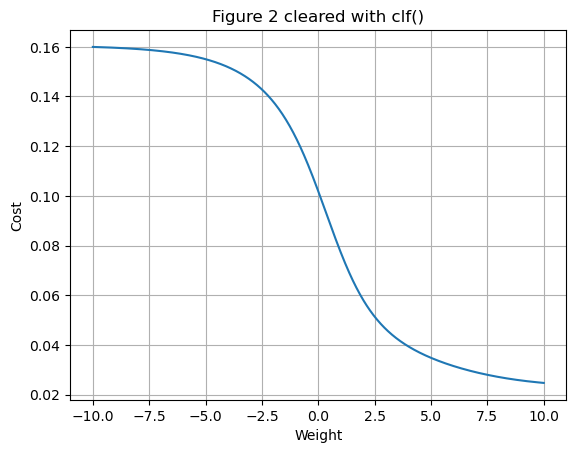

In [18]:
plt.clf()
plt.title("Figure 2 cleared with clf()")

plt.plot(weightsToTry, costs)
plt.grid(1)
plt.ylabel("Cost")
plt.xlabel("Weight")


0.04 sec - winner found.

But 2 weights?

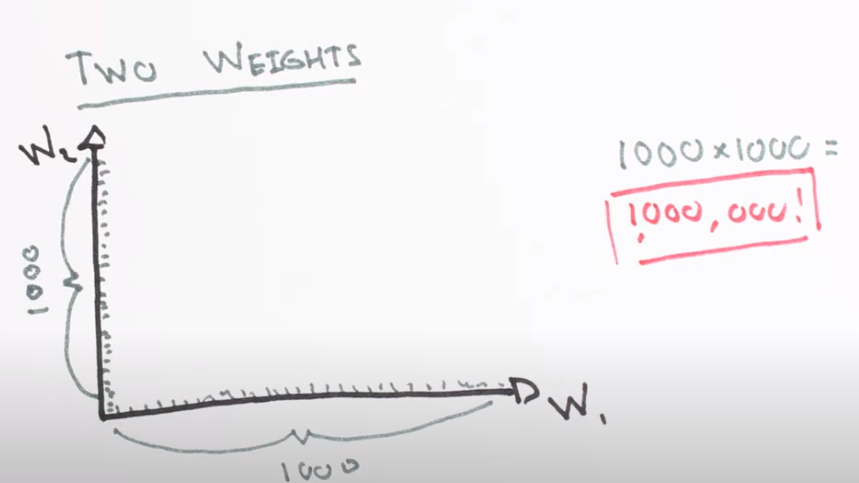

In [19]:
## from videoSupport import *
# weightsToTry = np.linspace(-10,10,1000)
# costs = np.zeros((1000, 1000))

# startTime = time.perf_counter()
# for i in range(1000):
#     for j in range(1000):
#         NN.W1[0,0] = weightsToTry[i]
#         NN.W1[0,1] = weightsToTry[j]
#         yHat = NN.forward(X)
#         costs[i] = 0.5 * np.sum((y - yHat) ** 2)

# endTime = time.perf_counter()

In [20]:
# timeElapsed = endTime - startTime
# timeElapsed

In [21]:
# plt.plot(weightsToTry, costs)
# plt.grid(1)
# plt.ylabel("Cost")
# plt.xlabel("Weight")

In [22]:
.04*(1000**(4-1))/(3600*24*365)

1.2683916793505834

In [23]:
# NN = Neural_Network()


In [24]:
yHat = NN.forward(X)

In [25]:
yHat

array([[0.69286793],
       [0.72637787],
       [0.73687271]])

In [26]:
y

array([[0.75],
       [0.82],
       [0.93]])

In [27]:
NN.W1[0,0] = 1.1
yHat = NN.forward(X)


In [28]:
np.sum(0.5*(y-yHat)**2)

0.07487681079615015

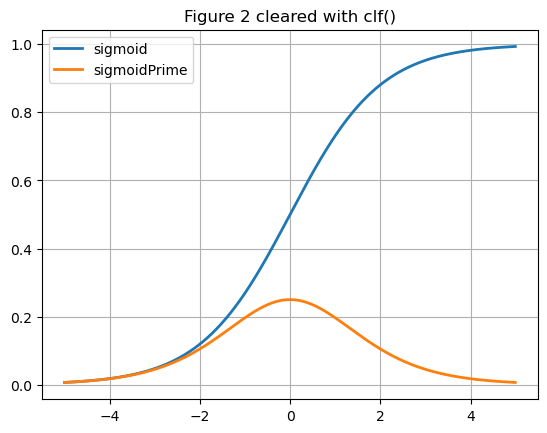

In [29]:
plt.clf()
plt.title("Figure 2 cleared with clf()")

testValues = np.arange(-5,5,0.01)
plt.plot(testValues, NN.sigmoid(testValues), linewidth=2)
plt.plot(testValues, NN.sigmoidPrime(testValues), linewidth=2)
plt.grid(1)
plt.legend(['sigmoid', 'sigmoidPrime'])

In [30]:
cost1 = NN.costFunction(X,y)

In [31]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)

In [32]:
dJdW1

array([[-0.02236773,  0.01557386, -0.01498437],
       [-0.01387212,  0.00936455, -0.0115134 ]])

In [33]:
dJdW2

array([[-0.06689563],
       [-0.05549475],
       [-0.07652216]])

In [34]:
scalar = 3
NN.W1 = NN.W1 + scalar * dJdW1
NN.W2 = NN.W2 + scalar * dJdW2
cost2 = NN.costFunction(X,y)


In [35]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)
NN.W1 = NN.W1 - scalar * dJdW1
NN.W2 = NN.W2 - scalar * dJdW2
cost3 = NN.costFunction(X,y)

In [36]:
print(cost2, cost1, cost3)

[0.12752756] [0.07487681] [0.05976177]


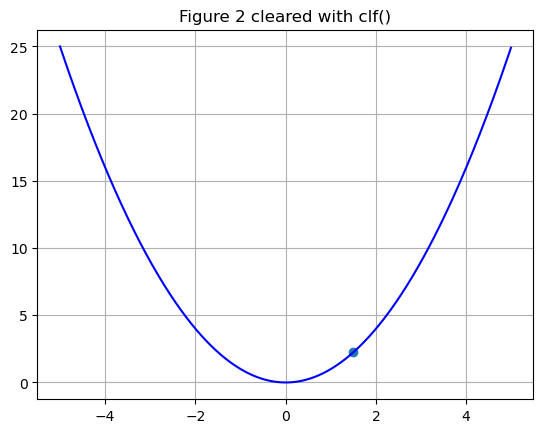

In [37]:
plt.clf()
plt.title("Figure 2 cleared with clf()")

x = np.arange(-5, 5, 0.01)

plt.plot(x, x**2, 'b')
plt.grid(1)
plt.scatter(1.5, 1.5**2)
# plt.xticks(range(1, 5))

In [38]:
def f(x):
    return x**2

epsilon = 1e-4
epsilon2 = 1*10**(-4)

x =1.5

In [39]:
numericGradient = (f(x+epsilon)-f(x-epsilon))/(2*epsilon)

numericGradient, 2*x

(2.9999999999996696, 3.0)

In [40]:
def computeNumericalGradient(N, X, y):
    paramsInitial = N.getParams()
    numgrad = np.zeros(paramsInitial.shape)
    perturb = np.zeros(paramsInitial.shape)
    e = 1e-4

    for p in range(len(paramsInitial)):
        # Set perturbation vector
        perturb[p] = e

        N.setParams(paramsInitial + perturb)
        loss2 = N.costFunction(X, y)

        N.setParams(paramsInitial -perturb)
        loss1 = N.costFunction(X, y)

        # Compute numerical gradient
        numgrad[p] = (loss2 - loss1) / (2 * e)

        # Return the changed value back to zero
        perturb[p] = 0
    
    # Return Params to original value^
    N.setParams(paramsInitial)

    return numgrad

In [41]:
numgrad = computeNumericalGradient(NN, X, y)
grad = NN.computeGradients(X, y)


/tmp/ipykernel_27958/1497865761.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  numgrad[p] = (loss2 - loss1) / (2 * e)


In [42]:
numgrad

array([-0.02055365,  0.01173704, -0.01459072, -0.01314918,  0.00721645,
       -0.01162122, -0.05713145, -0.04627937, -0.06555472])

In [43]:
grad

array([-0.02055365,  0.01173704, -0.01459072, -0.01314918,  0.00721645,
       -0.01162122, -0.05713145, -0.04627937, -0.06555472])

In [44]:
np.linalg.norm(grad - numgrad) / np.linalg.norm(grad + numgrad)

1.5985676092239445e-10

BFGS realization

In [45]:
class trainer(object):
    def __init__(self, N):
        # Make local reference to Neural Network:
        self.N = N

    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X,y)
        grad = self.N.computeGradients(X,y)
        return cost, grad
    
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))

    def train(self, X, y):
        # Make internal variable for callback function:
        self.X = X
        self.y = y

        # Make empty list to store costs:
        self.J = []

        params0 = self.N.getParams()

        options = {'maxiter':200, 'disp':True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, \
                                 method='BFGS', args=(X,y), options=options, \
                                    callback=self.callbackF)
        
        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [46]:
# NN = Neural_Network()
T = trainer(NN)
T.train(X, y)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 54
         Function evaluations: 60
         Gradient evaluations: 60


Text(0.5, 0, 'Iterations')

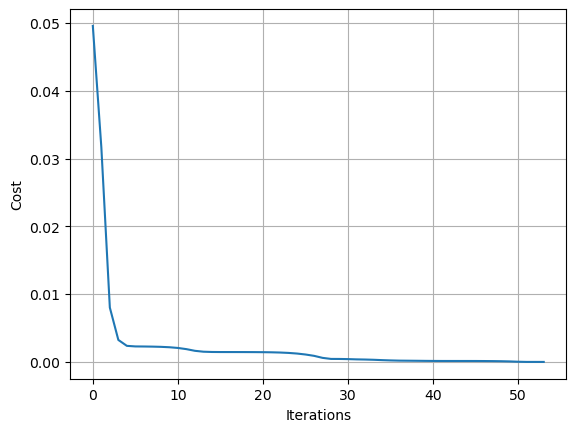

In [47]:
# plt.clf()
# plt.title("Figure 2 cleared with clf()")

plt.plot(T.J)
plt.grid(1)
plt.ylabel('Cost')
plt.xlabel('Iterations')

In [48]:
NN.costFunctionPrime(X, y)

(array([[-8.99147063e-07, -3.59243077e-07,  8.77883923e-08],
        [-3.15511706e-06,  8.44705056e-07,  4.24413735e-07]]),
 array([[-2.04919612e-06],
        [ 4.12763776e-07],
        [-1.28938249e-06]]))

In [49]:
NN.forward(X)

array([[0.74998369],
       [0.8200303 ],
       [0.92991766]])

In [50]:
y

array([[0.75],
       [0.82],
       [0.93]])

In [51]:
# Test network for various combinations of sleep/study
hoursSleep = np.linspace(0, 10, 100)
hoursStudy = np.linspace(0, 5, 100)

# Normalize data (same way training data way normalized)
hoursSleepNorm = hoursSleep/10
hoursStudyNorm = hoursStudy/5

# Create 2-d versions of input for plotting
a, b, = np.meshgrid(hoursSleepNorm, hoursStudyNorm)

# Join into a single input matrix
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()

In [52]:
allOutputs = NN.forward(allInputs)

Text(0, 0.5, 'Hours Study')

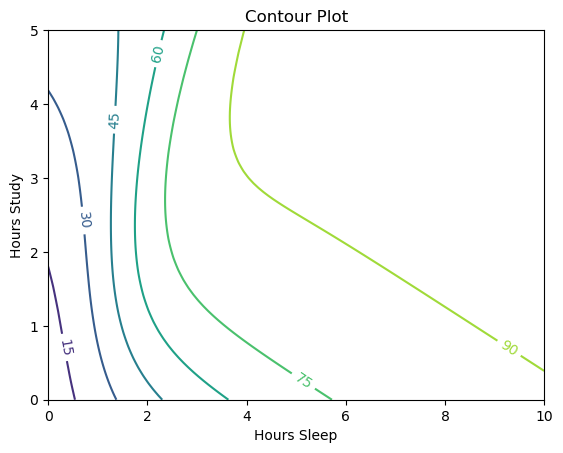

In [53]:
# Make Contour Plot
plt.clf()
plt.title("Contour Plot")

yy = np.dot(hoursStudy.reshape(100, 1), np.ones((1, 100)))
xx = np.dot(hoursSleep.reshape(100, 1), np.ones((1, 100))).T

CS = plt.contour(xx, yy, 100*allOutputs.reshape(100, 100))
plt.clabel(CS, inline = 1, fontsize = 10)
plt.xlabel('Hours Sleep')
plt.ylabel('Hours Study')

Text(0.5, 0, 'Test Score')

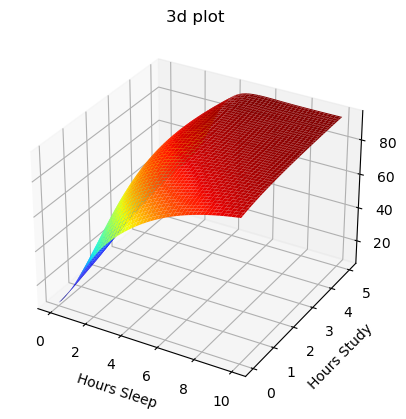

In [54]:


# Make 3d plot
# %matplotlib qt
# %matplotlib widget

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

surf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100,100), cmap = cm.jet)

ax.set_title('3d plot')
ax.set_xlabel('Hours Sleep')
ax.set_ylabel('Hours Study')
ax.set_zlabel('Test Score')


## Noise

**Observation = Signal + Noise**

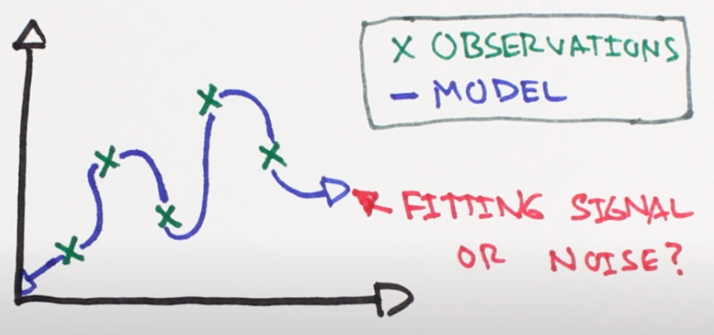